In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the RiverAtlas Shapefile
shapefile_path = "/home/bsurya/Projects/AIR-Zones/data/aqueduct_global_maps_21_shp/aqueduct_global_dl_20150409.shp"

df = gpd.read_file(shapefile_path)
df.head()

,GU,Shape_Leng,Shape_Area,BasinID,COUNTRY,BASIN_NAME,WITHDRAWAL,CONSUMPTIO,BA,BWS,...,W_CHEM,W_POWER,W_MINE,W_OILGAS,DEF_PQUANT,W_AGR,W_FOODBV,W_TEX,OWR_cat,geometry
0,1,0.559986,0.005929,439,Guinea Bissau,NaN,318530368.0,2.191088e+08,9.921439e+09,0.032105,...,2.882769,1.652696,2.817264,3.574223,0.953074,1.674275,2.102334,1.782311,Low to medium risk (1-2),"MULTIPOLYGON (((-14.75230 12.61884, -14.77145 ..."
1,2,2.272372,0.099605,441,Guinea Bissau,NaN,14757104.0,5.604148e+06,5.116468e+09,0.002884,...,2.841154,1.564447,2.664640,3.529458,0.826442,1.600816,2.142925,1.746387,Low to medium risk (1-2),"MULTIPOLYGON (((-16.13768 12.29410, -16.14387 ..."
2,3,0.610379,0.017086,444,Guinea,GEBA,34460596.0,1.764853e+07,9.535255e+09,0.003614,...,2.774803,1.551692,2.707415,3.352587,0.891978,1.582219,2.270701,1.773006,Low to medium risk (1-2),"POLYGON ((-13.56238 12.66743, -13.56143 12.659..."
3,4,5.384966,0.636739,444,Guinea Bissau,GEBA,34460596.0,1.764853e+07,9.535255e+09,0.003614,...,2.897160,1.571053,2.834815,3.544556,0.891978,1.660348,2.335788,1.858815,Medium to high risk (2-3),"POLYGON ((-13.73218 12.57834, -13.74419 12.577..."
4,5,1.815190,0.055072,446,Guinea Bissau,NaN,6855107.0,2.852844e+06,1.839854e+09,0.003726,...,2.878972,1.549313,2.687177,3.524936,0.819780,1.629414,2.316616,1.815062,Low to medium risk (1-2),"MULTIPOLYGON (((-15.72857 11.97126, -15.72700 ..."


In [30]:
df.columns

Index(['GU', 'Shape_Leng', 'Shape_Area', 'BasinID', 'COUNTRY', 'BASIN_NAME',
       'WITHDRAWAL', 'CONSUMPTIO', 'BA', 'BWS', 'BWS_s', 'BWS_cat', 'WSV',
       'WSV_s', 'WSV_cat', 'SV', 'SV_s', 'SV_cat', 'HFO', 'HFO_s', 'HFO_cat',
       'DRO', 'DRO_s', 'DRO_cat', 'BT', 'STOR', 'STOR_s', 'STOR_cat', 'GW',
       'GW_s', 'GW_cat', 'WRI', 'WRI_s', 'WRI_cat', 'ECO_S', 'ECO_S_s',
       'ECO_S_cat', 'MC', 'MC_s', 'MC_cat', 'ECO_V', 'ECO_V_s', 'ECO_V_cat',
       'WCG', 'WCG_s', 'WCG_cat', 'DEF_PQUAL', 'DEF_REGREP', 'W_SEMICO',
       'DEFAULT', 'W_CONSTR', 'W_CHEM', 'W_POWER', 'W_MINE', 'W_OILGAS',
       'DEF_PQUANT', 'W_AGR', 'W_FOODBV', 'W_TEX', 'OWR_cat', 'geometry'],
      dtype='object')

In [32]:
df.BWS_s.max()

5.0

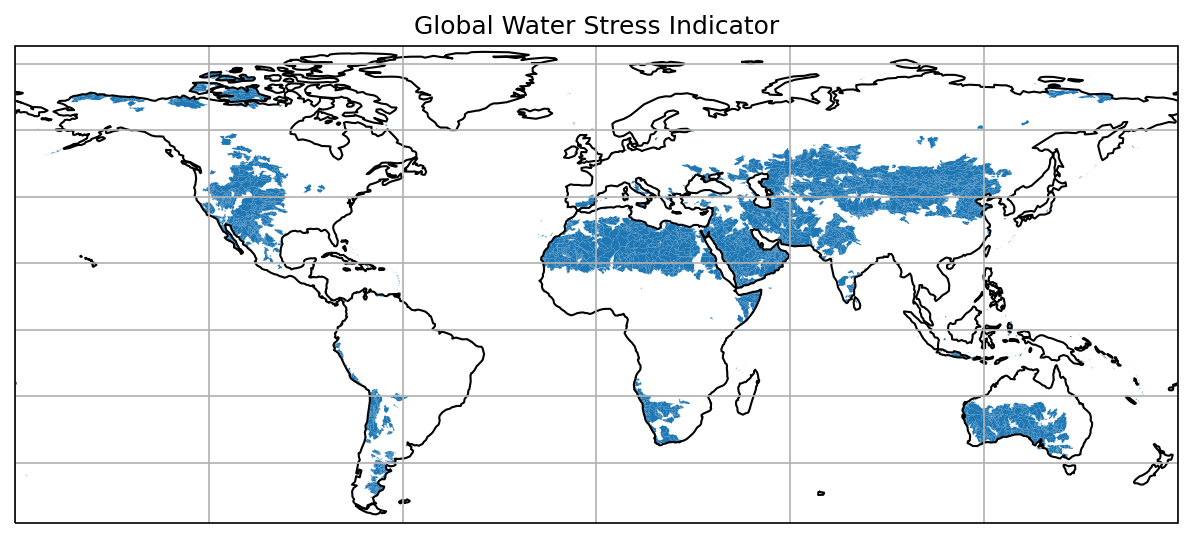

In [44]:
# Increase figure size and resolution
fig = plt.figure(figsize=(10, 6), dpi=150)

# Create a new axis with a PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
df[df.BWS_s>=4].plot(ax=ax)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set plot title
plt.title(f'Global Water Stress Indicator')

# Save the plot as a PNG image
output_image = 'figs/water_stress.png'
plt.savefig(output_image, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

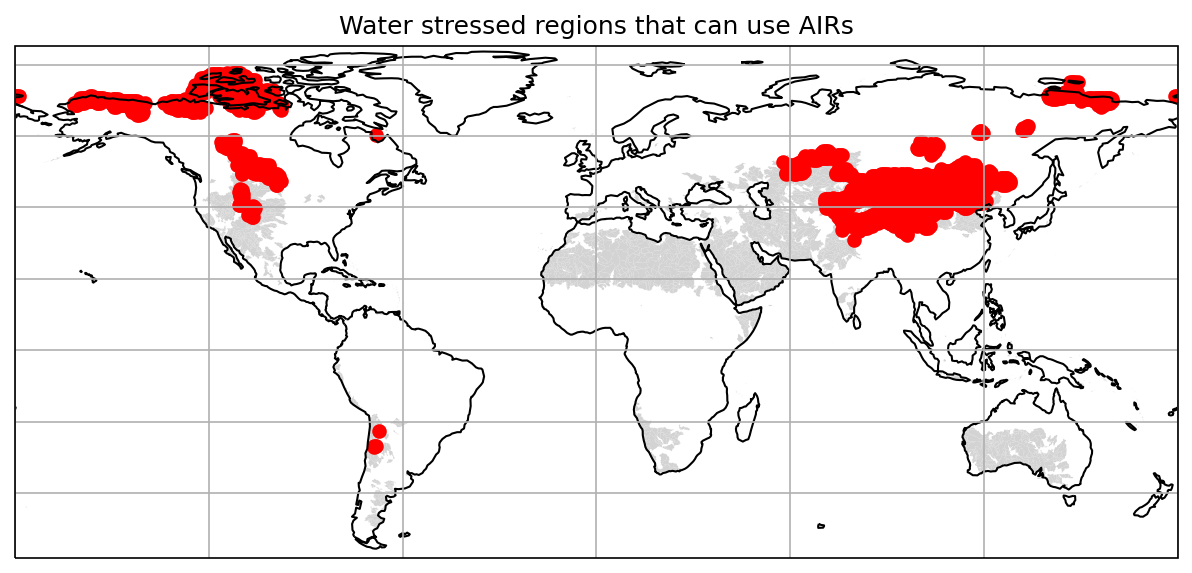

In [50]:
# Read the first shapefile
shapefile1 = gpd.read_file('data/selected_locations.shp')

# Read the second shapefile
shapefile2 = df[df.BWS_s>=4]

# Perform intersection
intersection = gpd.overlay(shapefile1, shapefile2, how='intersection')

# Increase figure size and resolution
fig = plt.figure(figsize=(10, 6), dpi=150)

# Create a new axis with a PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot shapefile 2 as background
shapefile2.plot(ax=ax, color='lightgray')
# Plot the intersection
intersection.plot(ax=ax, color='red')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set plot title and labels
ax.set_title('Water stressed regions that can use AIRs')

# Save the plot as a PNG image
output_image = 'figs/AIRs_for_water_stress.png'
plt.savefig(output_image, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the first shapefile
gdf1 = gpd.read_file('data/selected_locations.shp')

# Read the second shapefile
gdf2 = df[df.BWS_s>=4]

# Find the intersection between shapefile 1 and shapefile 2
intersection = gpd.overlay(gdf2, gdf1, how='intersection')

# Create a copy of shapefile 2
shapefile2_copy = gdf2.copy()

# Set a flag column indicating whether each polygon intersects or not
shapefile2_copy['intersects'] = shapefile2_copy.intersects(gdf1.unary_union)

# Create a plot of shapefile 2 polygons
ax = shapefile2_copy.plot(column='intersects', cmap='coolwarm', legend=True)

# Plot the intersection polygons on top with a different color
intersection.plot(ax=ax, color='yellow')

# Add legends and labels
ax.legend(['Shapefile 2', 'Intersection'])
plt.title('Intersection between Shapefile 1 and Shapefile 2')

# Show the plot
plt.show()

/tmp/ipykernel_206892/163624889.py:11: UserWarning: `keep_geom_type=True` in overlay resulted in 2966 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = gpd.overlay(gdf2, gdf1, how='intersection')


/tmp/ipykernel_227690/2942377969.py:11: UserWarning: `keep_geom_type=True` in overlay resulted in 2966 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = gpd.overlay(gdf2, gdf1, how='intersection')


ValueError: aspect must be finite and positive 

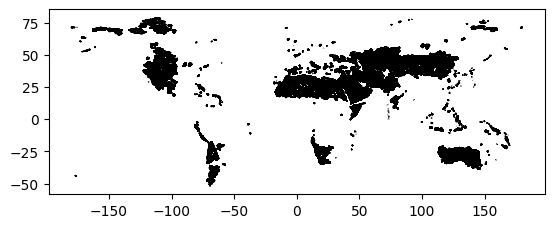

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the first shapefile
gdf1 = gpd.read_file('data/selected_locations.shp')

# Read the second shapefile
gdf2 = df[df.BWS_s>=4]

# Find the intersecting polygons between shapefile 1 and shapefile 2
intersection = gpd.overlay(gdf2, gdf1, how='intersection')

# Create a copy of shapefile 2
shapefile2_copy = gdf2.copy()

# Set a flag column indicating whether each polygon intersects or not
shapefile2_copy['intersects'] = shapefile2_copy.intersects(gdf1.unary_union)

# Plot shapefile 2 polygons
ax = shapefile2_copy.plot(color='lightgray', edgecolor='black')

# Plot the intersecting polygons with a different color
intersection.plot(ax=ax, color='red')

# Add legends and labels
ax.legend(['Shapefile 2', 'Intersection'])
plt.title('Intersection between Shapefile 1 and Shapefile 2')

# Show the plot
plt.show()
